# Heatmaps

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor 
%matplotlib inline

In [2]:
#Read all 4 datasets into python

"""To join, or not to join, that is the question..."""

met = pd.read_csv("C:/Users/btjoa/OneDrive/Desktop/Babson/Grad/Programming in Python/Personal Projects/Field Project/Store Business and Scheduling Metrics 2.csv")
log = pd.read_csv("C:/Users/btjoa/OneDrive/Desktop/Babson/Grad/Field Project/Data/Initial Drop/Logons 2.csv")
# exc = pd.read_csv("C:/Users/btjoa/OneDrive/Desktop/Babson/Grad/Field Project/Data/Initial Drop/Executions.csv")
# walk = pd.read_csv("C:/Users/btjoa/OneDrive/Desktop/Babson/Grad/Field Project/Data/Initial Drop/Store Walks.csv")

In [3]:
met = met.drop("Average Efficiency", axis = 1)

In [4]:
met = met.drop("Week No", axis = 1)

In [5]:
log['Logons'] = log['Logons'].apply(pd.to_numeric, args=('coerce',))
log.isnull().values.any()

True

In [6]:
log[log.isnull().any(axis=1)]

,Str Id,Week Start Date,Logons
6543,S40514,8/30/2020,NaN


In [7]:
log['Logons'] = log['Logons'].replace(np.nan, 0)

In [8]:
met_log = met.merge(log, how='left', on=["Str Id", "Week Start Date"])

In [9]:
met_log.isnull().values.any()

False

In [10]:
met_log.head()

,Str Id,Dist Id,Week Start Date,Fcst Sales,Fcst Txns,Fcst Items,Fcst Hrs,Fcst Labor Cost,Sched Hrs,Sched Labor Cost,...,Act Txns,Act Items,Act Hrs,Act Labor Cost,Sched Shifts SYS,Sched Efficiency SYS,Sched Shifts MGR,Sched Efficiency MGR,Sched Edits,Logons
0,S33688,D864,11/22/2020,827,56,857,159.30,2752,79.36,1574,...,93,130,41.55,1071,9,0.56,9,0.56,0,0.0
1,S33688,D864,11/15/2020,1121,86,956,179.72,3104,96.28,1663,...,116,457,50.92,1071,12,0.67,12,0.67,0,3.0
2,S33688,D864,9/6/2020,3016,51,1274,133.60,2320,96.28,1663,...,59,59,30.56,1198,12,0.70,12,0.70,0,1.0
3,S33688,D864,11/8/2020,3130,91,1105,179.72,3104,96.28,1663,...,124,227,39.96,1192,12,0.66,12,0.66,0,7.0
4,S33688,D864,10/4/2020,3148,91,1160,134.12,2317,96.28,1663,...,60,63,60.66,1183,12,0.65,12,0.65,0,4.0


In [11]:
met_log[met_log.isnull().any(axis=1)]

,Str Id,Dist Id,Week Start Date,Fcst Sales,Fcst Txns,Fcst Items,Fcst Hrs,Fcst Labor Cost,Sched Hrs,Sched Labor Cost,...,Act Txns,Act Items,Act Hrs,Act Labor Cost,Sched Shifts SYS,Sched Efficiency SYS,Sched Shifts MGR,Sched Efficiency MGR,Sched Edits,Logons


1. original heatmap
2. remove logons and efficiency
3. remove forecasts
4. heatmap for with composite variables

# Original Heatmap

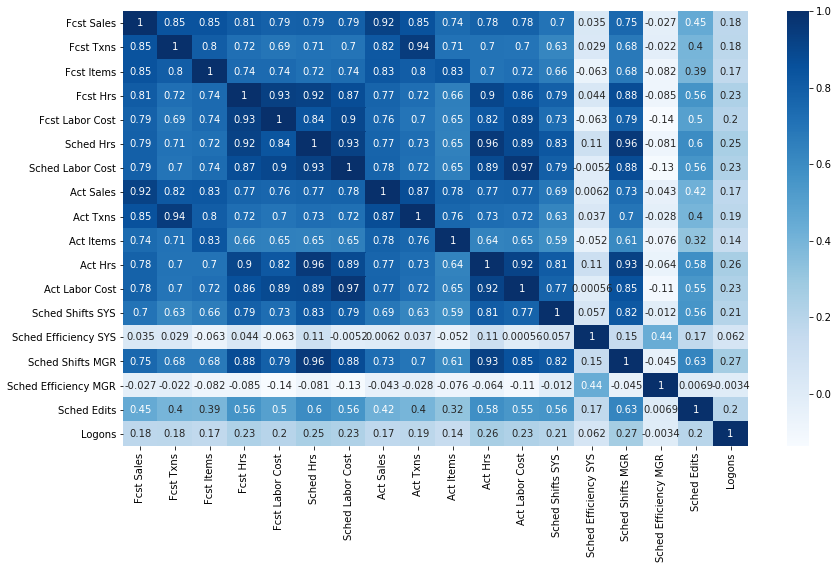

In [12]:
plt.pyplot.figure(figsize=(14,8))
sns.heatmap(met_log.corr(), cmap="Blues", annot = True) #change color using cmap

# Logons and Efficiency removed (and low correlation)

In [13]:
met_copy = met.drop("Sched Efficiency MGR", axis = 1)

In [14]:
met_copy = met.drop("Sched Efficiency SYS", axis = 1)

In [18]:
met_copy["Over/Understaffing"] = met_copy["Sched Hrs"] - met_copy["Act Hrs"]

In [15]:
met_copy.head()

,Str Id,Dist Id,Week Start Date,Fcst Sales,Fcst Txns,Fcst Items,Fcst Hrs,Fcst Labor Cost,Sched Hrs,Sched Labor Cost,Act Sales,Act Txns,Act Items,Act Hrs,Act Labor Cost,Sched Shifts SYS,Sched Shifts MGR,Sched Efficiency MGR,Sched Edits
0,S33688,D864,11/22/2020,827,56,857,159.30,2752,79.36,1574,2979,93,130,41.55,1071,9,9,0.56,0
1,S33688,D864,11/15/2020,1121,86,956,179.72,3104,96.28,1663,3128,116,457,50.92,1071,12,12,0.67,0
2,S33688,D864,9/6/2020,3016,51,1274,133.60,2320,96.28,1663,2752,59,59,30.56,1198,12,12,0.70,0
3,S33688,D864,11/8/2020,3130,91,1105,179.72,3104,96.28,1663,3648,124,227,39.96,1192,12,12,0.66,0
4,S33688,D864,10/4/2020,3148,91,1160,134.12,2317,96.28,1663,2856,60,63,60.66,1183,12,12,0.65,0


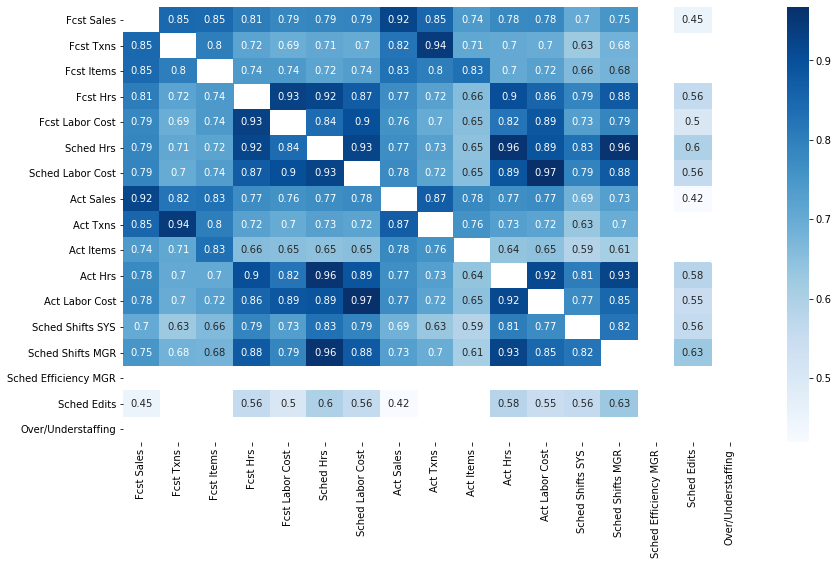

In [19]:
corr = met_copy.corr()
kot = corr[abs(corr)<=.98]
kot = kot[abs(kot)>=.4]
plt.pyplot.figure(figsize=(14,8))
sns.heatmap(kot, cmap="Blues", annot = True) 

# Forecasts Removed 

In [20]:
met_no_fcst = met_copy.drop("Fcst Sales", axis = 1)

In [21]:
met_no_fcst = met_no_fcst.drop("Fcst Txns", axis = 1)

In [22]:
met_no_fcst = met_no_fcst.drop("Fcst Items", axis = 1)

In [23]:
met_no_fcst = met_no_fcst.drop("Fcst Labor Cost", axis = 1)

In [24]:
met_no_fcst = met_no_fcst.drop("Fcst Hrs", axis = 1)

In [25]:
met_no_fcst.head()

,Str Id,Dist Id,Week Start Date,Sched Hrs,Sched Labor Cost,Act Sales,Act Txns,Act Items,Act Hrs,Act Labor Cost,Sched Shifts SYS,Sched Shifts MGR,Sched Efficiency MGR,Sched Edits,Over/Understaffing
0,S33688,D864,11/22/2020,79.36,1574,2979,93,130,41.55,1071,9,9,0.56,0,37.81
1,S33688,D864,11/15/2020,96.28,1663,3128,116,457,50.92,1071,12,12,0.67,0,45.36
2,S33688,D864,9/6/2020,96.28,1663,2752,59,59,30.56,1198,12,12,0.70,0,65.72
3,S33688,D864,11/8/2020,96.28,1663,3648,124,227,39.96,1192,12,12,0.66,0,56.32
4,S33688,D864,10/4/2020,96.28,1663,2856,60,63,60.66,1183,12,12,0.65,0,35.62


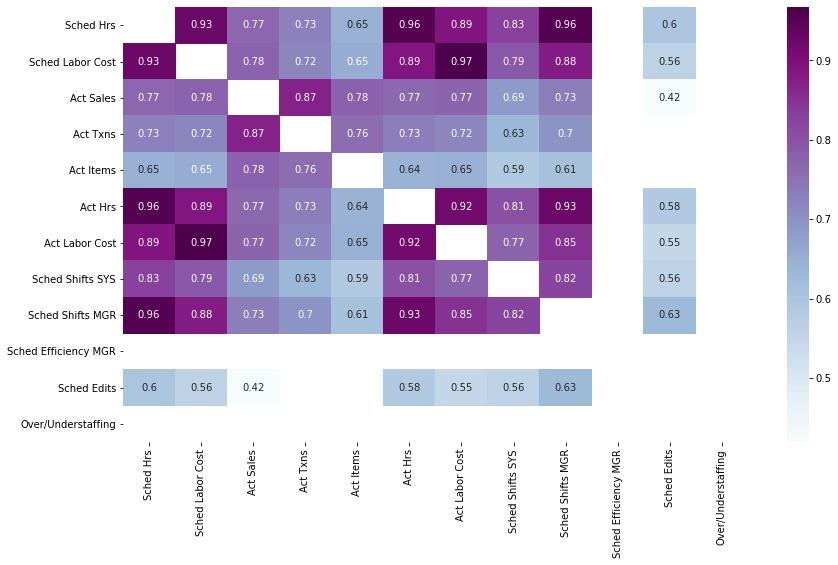

In [26]:
corr = met_no_fcst.corr()
kot = corr[abs(corr)<=.98]
kot = kot[abs(kot)>=.4]
plt.pyplot.figure(figsize=(14,8))
sns.heatmap(kot, cmap="BuPu", annot = True) 

In [27]:
m_c = met_no_fcst.copy()
m_c

,Str Id,Dist Id,Week Start Date,Sched Hrs,Sched Labor Cost,Act Sales,Act Txns,Act Items,Act Hrs,Act Labor Cost,Sched Shifts SYS,Sched Shifts MGR,Sched Efficiency MGR,Sched Edits,Over/Understaffing
0,S33688,D864,11/22/2020,79.36,1574,2979,93,130,41.55,1071,9,9,0.56,0,37.81
1,S33688,D864,11/15/2020,96.28,1663,3128,116,457,50.92,1071,12,12,0.67,0,45.36
2,S33688,D864,9/6/2020,96.28,1663,2752,59,59,30.56,1198,12,12,0.70,0,65.72
3,S33688,D864,11/8/2020,96.28,1663,3648,124,227,39.96,1192,12,12,0.66,0,56.32
4,S33688,D864,10/4/2020,96.28,1663,2856,60,63,60.66,1183,12,12,0.65,0,35.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16464,S57858,D873,12/13/2020,666.36,11491,129979,2701,9407,608.17,10419,72,78,0.00,128,58.19
16465,S57858,D873,11/15/2020,670.44,11587,155574,3248,13508,609.10,10629,72,79,0.00,117,61.34
16466,S34274,D660,8/30/2020,339.60,5586,123855,1095,2933,325.41,5427,40,41,0.29,42,14.19
16467,S57858,D873,11/29/2020,652.35,11265,143645,2971,14981,615.13,10480,71,77,0.00,120,37.22


In [28]:
m_c = m_c.drop("Sched Shifts SYS", axis = 1)

In [29]:
m_c = m_c.drop("Sched Shifts MGR", axis = 1)

In [30]:
m_c = m_c.drop("Sched Efficiency MGR", axis = 1)

In [31]:
m_c = m_c.drop("Sched Edits", axis = 1)

In [ ]:
m_c = m_c.drop("Sched Hrs", axis = 1)

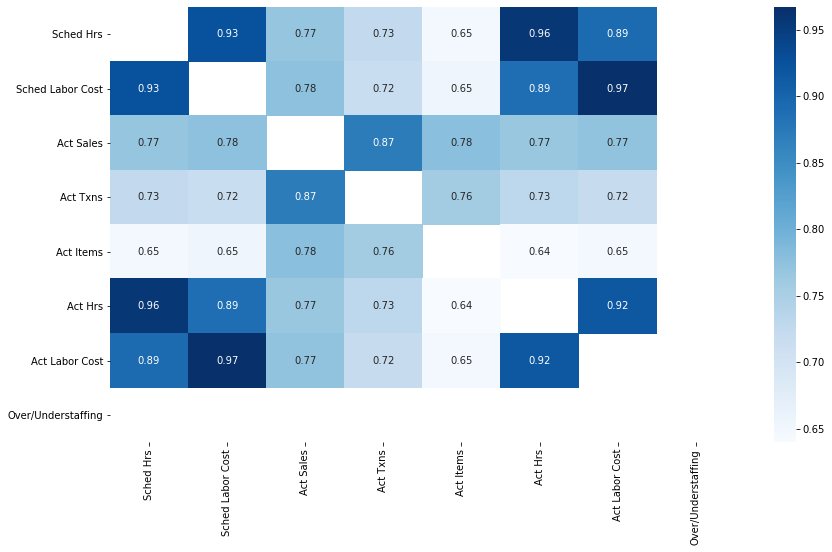

In [32]:
corr = m_c.corr()
kot = corr[abs(corr)<=.98]
kot = kot[abs(kot)>=.4]
plt.pyplot.figure(figsize=(14,8))
sns.heatmap(kot, cmap = "Blues", annot = True) 

# Aggregating Highly Correlated Variables (Feature Reduction)


In [33]:
met_c = met_no_fcst.copy()
met_c.head()

,Str Id,Dist Id,Week Start Date,Sched Hrs,Sched Labor Cost,Act Sales,Act Txns,Act Items,Act Hrs,Act Labor Cost,Sched Shifts SYS,Sched Shifts MGR,Sched Efficiency MGR,Sched Edits,Over/Understaffing
0,S33688,D864,11/22/2020,79.36,1574,2979,93,130,41.55,1071,9,9,0.56,0,37.81
1,S33688,D864,11/15/2020,96.28,1663,3128,116,457,50.92,1071,12,12,0.67,0,45.36
2,S33688,D864,9/6/2020,96.28,1663,2752,59,59,30.56,1198,12,12,0.70,0,65.72
3,S33688,D864,11/8/2020,96.28,1663,3648,124,227,39.96,1192,12,12,0.66,0,56.32
4,S33688,D864,10/4/2020,96.28,1663,2856,60,63,60.66,1183,12,12,0.65,0,35.62


In [34]:
met_c.isnull().values.any()

False

In [35]:
# Act Sales vs Act Txns
# met_copy["Act Sales/Act Txns"] = met_copy["Act Sales"]/met_copy["Act Txns"]

In [36]:
# Act Sales vs Act Items
met_c["Act Sales/Act Items"] = met_copy["Act Sales"]/met_copy["Act Items"]

In [37]:
# Act Sales vs Act Hrs
met_c["Act Sales/Act Hrs"] = met_copy["Act Sales"]/met_copy["Act Hrs"]

In [38]:
# Act Sales vs Act LC
met_c["Act Sales/Act Labor Cost"] = met_copy["Act Sales"]/met_copy["Act Labor Cost"]

In [39]:
# Act Txns vs Act Items
met_c["Act Txns/Act Items"] = met_copy["Act Txns"]/met_copy["Act Items"]

In [40]:
# Act Sales vs Act Hrs
met_c["Act Txns/Act Hrs"] = met_copy["Act Txns"]/met_copy["Act Hrs"]

In [41]:
# Act Txns vs Act LC
met_c["Act Txns/Act Labor Cost"] = met_copy["Act Txns"]/met_copy["Act Labor Cost"]

In [42]:
# Act Items vs Act Hrs
met_c["Act Items/Act Hrs"] = met_copy["Act Items"]/met_copy["Act Hrs"]

In [43]:
# Act Items vs Act LC
met_c["Act Items/Act Labor Cost"] = met_copy["Act Items"]/met_copy["Act Labor Cost"]

In [44]:
# Act Hrs vs Sched Edits
met_c["Act Hrs/Sched Edits"] = met_copy["Act Hrs"]/met_copy["Sched Edits"]

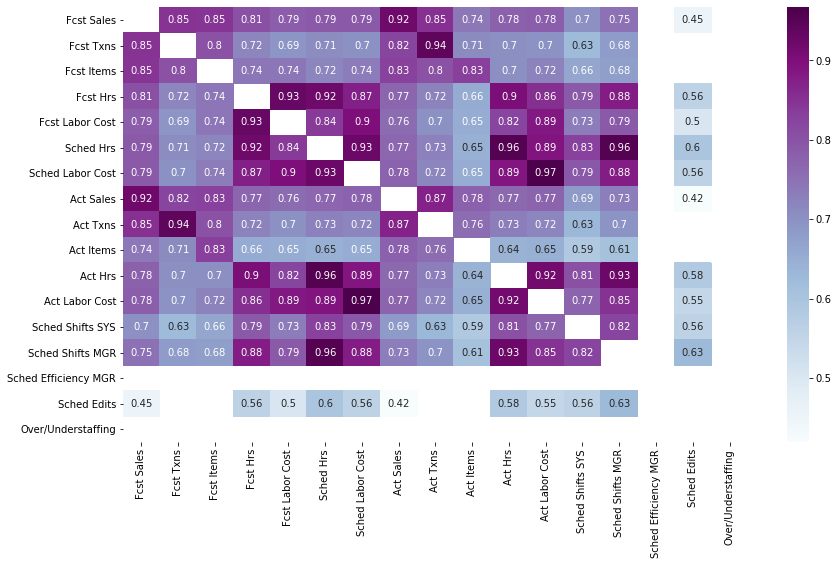

In [45]:
corr_2 = met_copy.corr()
kot_2 = corr_2[abs(corr_2)<=.98]
kot_2 = kot_2[abs(kot_2)>=.4]
plt.pyplot.figure(figsize=(14,8))
sns.heatmap(kot_2, cmap="BuPu", annot = True) 

In [50]:
met_copy_2 = met_c[["Act Sales/Act Items", "Act Sales/Act Hrs", "Act Sales/Act Labor Cost", "Act Txns/Act Items", "Act Txns/Act Hrs", "Act Txns/Act Labor Cost", "Act Items/Act Hrs", "Act Items/Act Labor Cost", "Over/Understaffing"]].copy()

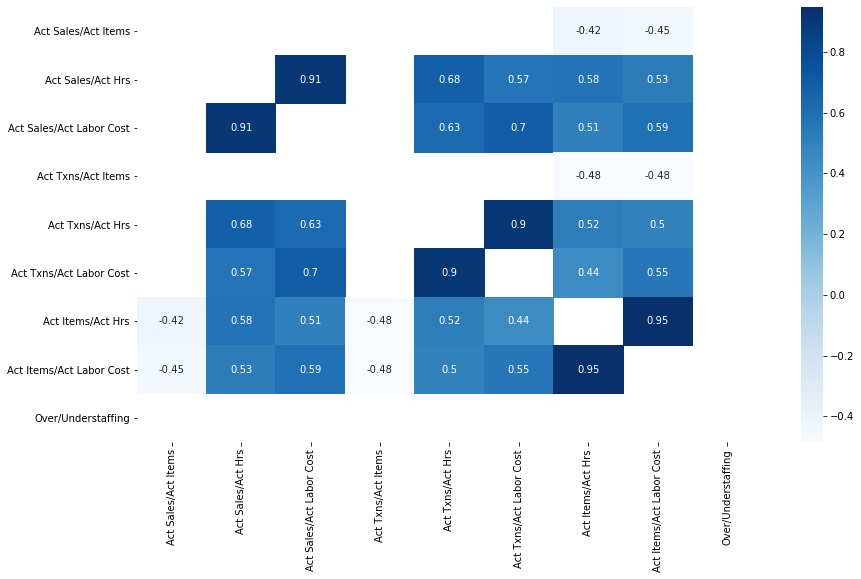

In [51]:
corr_3 = met_copy_2.corr()
kot_3 = corr_3[abs(corr_3)<=.98]
kot_3 = kot_3[abs(kot_3)>=.4]
plt.pyplot.figure(figsize=(14,8))
sns.heatmap(kot_3, cmap="Blues", annot = True) 

# K-Means

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

C:\Users\btjoa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
df = pd.read_csv("C:/Users/btjoa/OneDrive/Desktop/Babson/Grad/Field Project/Data/Initial Drop/Store Business and Scheduling Metrics 2.csv")

In [ ]:
#Removing useless variables
df = 

In [14]:
import math
n = [x for x in range(1,8)]

n = [math.sqrt(i) for i in n]

print(n)

[1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907]
